# Data Exploration 04

In [1]:
from utils import utils
import datetime
now = datetime.datetime.now()
print(f'Version: {now.strftime("%Y-%m-%d %H:%M:%S")}')

Version: 2020-04-03 10:58:18


# Feature Engineering

In [2]:
# import data and featureset
from utils import utils
import pandas as pd

dataset = './data/dataset_benchmark.csv'
featureset = './features/features_custom.yaml'

df, x, y, x_train, x_test, y_train, y_test = utils.load_benchmark_dataset(dataset, featureset, dropna=False)
classes = ['CN', 'MCI', 'AD']

Loading dataset from ./data/dataset_benchmark.csv
Loading features from ./features/features_custom.yaml
dataset length: 8882
x_train length: 7993
y_train length: 7993
x_test length: 889
y_test length: 889


In [3]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8882 entries, 0 to 8881
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   diagnosis_encoded                     8882 non-null   int64  
 1   ADAS13                                6192 non-null   float64
 2   Ventricles                            5731 non-null   float64
 3   CDRSB                                 6211 non-null   float64
 4   ADAS11                                6242 non-null   float64
 5   MMSE                                  6252 non-null   float64
 6   RAVLT_immediate                       6218 non-null   float64
 7   Hippocampus                           5242 non-null   float64
 8   WholeBrain                            5910 non-null   float64
 9   Entorhinal                            5029 non-null   float64
 10  MidTemp                               5029 non-null   float64
 11  APOE4            

In [4]:
# assess missingness -> not in this script
# the one before (3) should be assessing the benchmark dataset
import missingno as msno

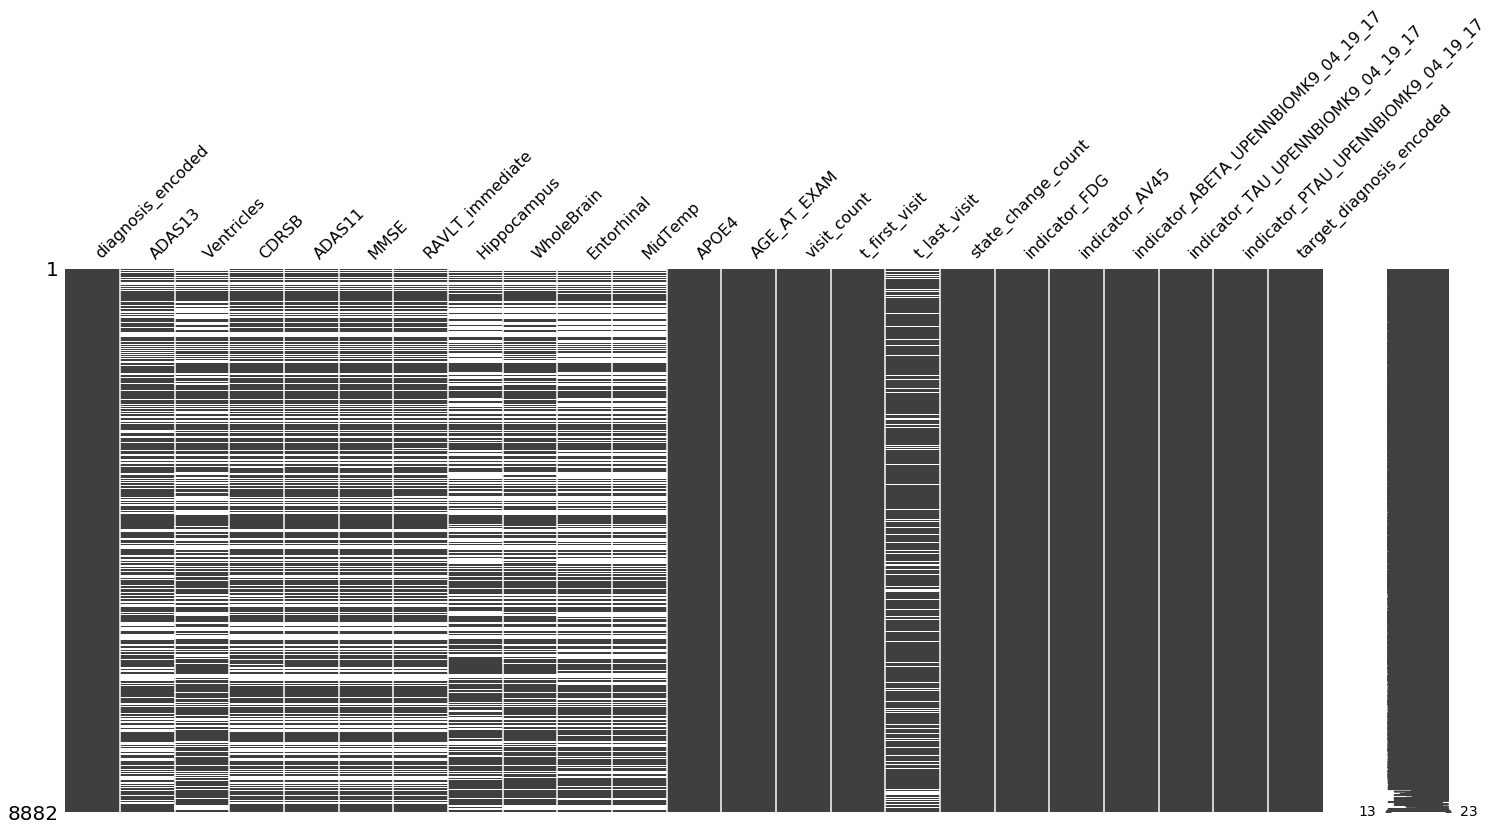

In [5]:
# matrix
msno.matrix(df)

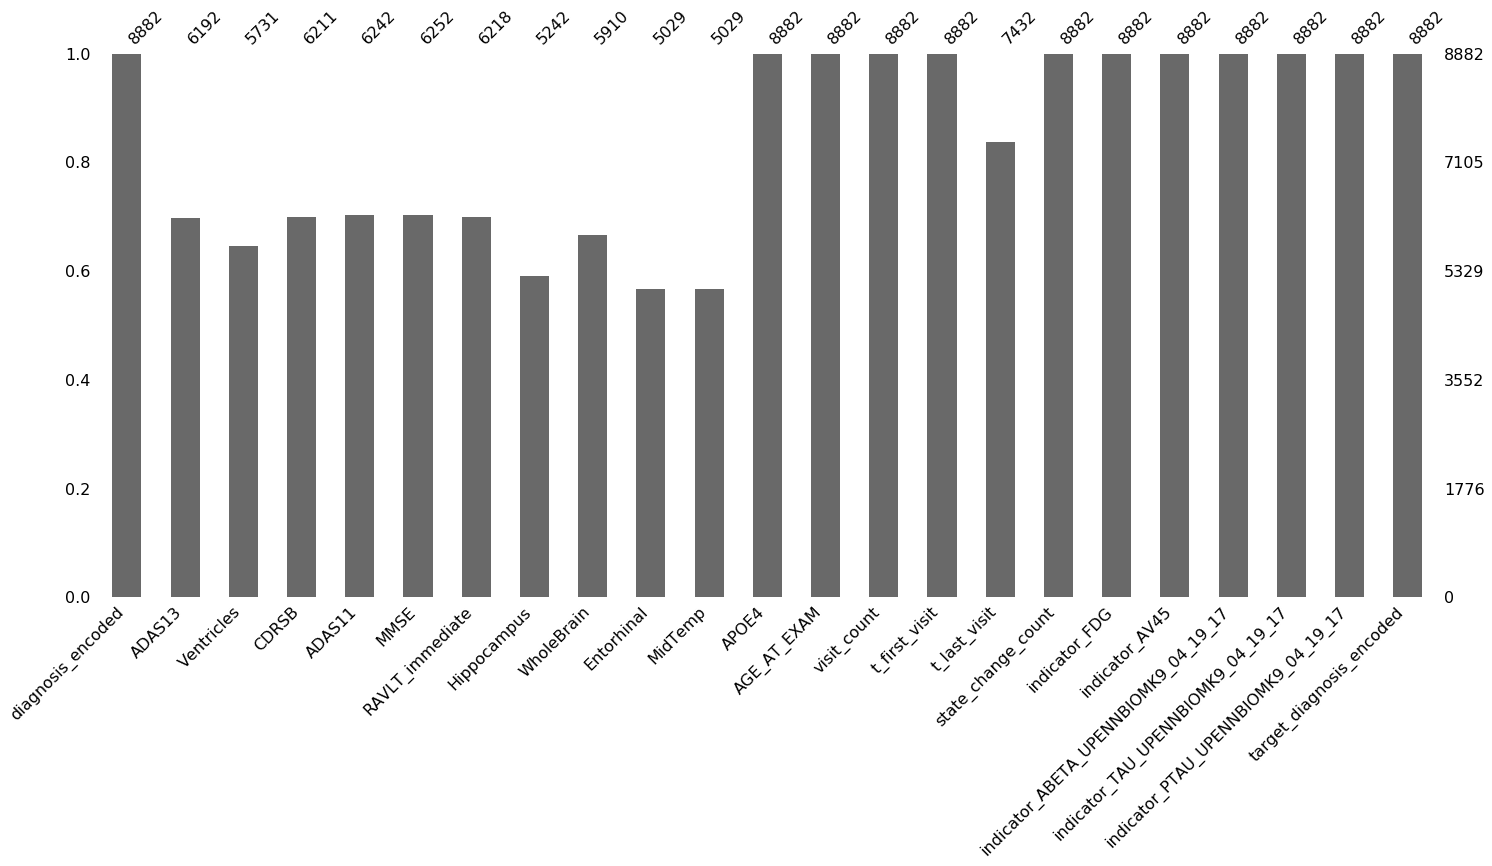

In [6]:
# bar
msno.bar(df)

In [7]:
# reimport with NaNs dropped 
df, x, y, x_train, x_test, y_train, y_test = utils.load_benchmark_dataset(dataset, featureset, dropna=True)

# setup temp_y for compatibility with some algorithms
temp_y = y.to_numpy().reshape(-1,)

Loading dataset from ./data/dataset_benchmark.csv
Loading features from ./features/features_custom.yaml
dataset length: 2985
x_train length: 2686
y_train length: 2686
x_test length: 299
y_test length: 299


/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


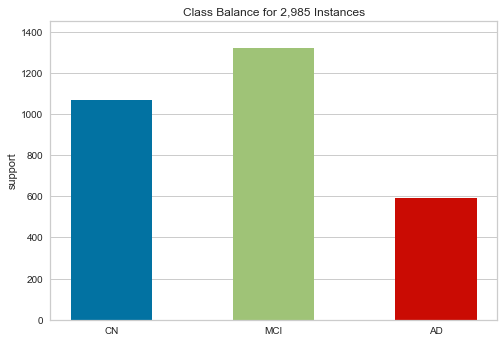

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a254738d0>,
             colormap=None, colors=None, labels=['CN', 'MCI', 'AD'])

In [8]:
# class balance of dataset
from yellowbrick.target import class_balance

class_balance(y, labels=classes)

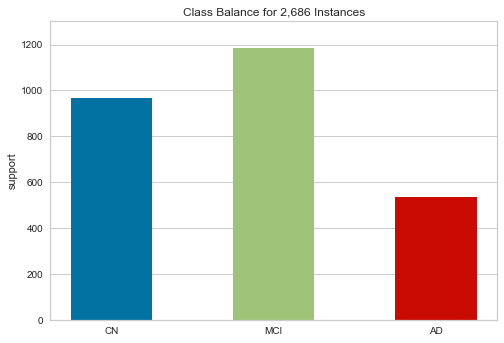

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cf99810>,
             colormap=None, colors=None, labels=['CN', 'MCI', 'AD'])

In [9]:
# class balance of training set
from yellowbrick.target import class_balance

class_balance(y_train, labels=classes)

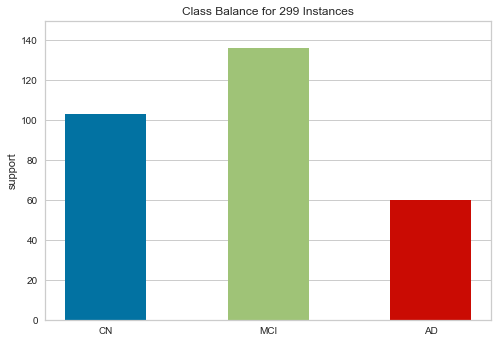

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a255f7290>,
             colormap=None, colors=None, labels=['CN', 'MCI', 'AD'])

In [10]:
# class balance of testing set
from yellowbrick.target import class_balance

class_balance(y_test, labels=classes)

In [11]:
# look at the distribution of the data

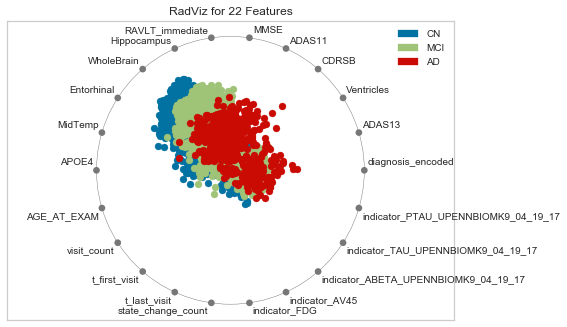

RadialVisualizer(alpha=1.0,
                 ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cf8fcd0>,
                 classes=['CN', 'MCI', 'AD'], colormap=None, colors=None,
                 features=None)

In [12]:
# radviz
from yellowbrick.features import radviz

radviz(x, temp_y, classes=classes)

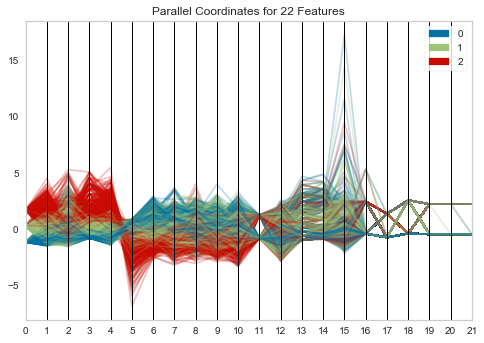

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ParallelCoordinates(alpha=None,
                    ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a34baf910>,
                    classes=None, colormap=None, colors=None, fast=False,
                    features=None, normalize=None, random_state=None,
                    sample=1.0, shuffle=False, vlines=None,
                    vlines_kwds={'color': 'black', 'linewidth': 1})

In [13]:
# parallel coordinates
from yellowbrick.features import parallel_coordinates
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

parallel_coordinates(x_scaled, temp_y)

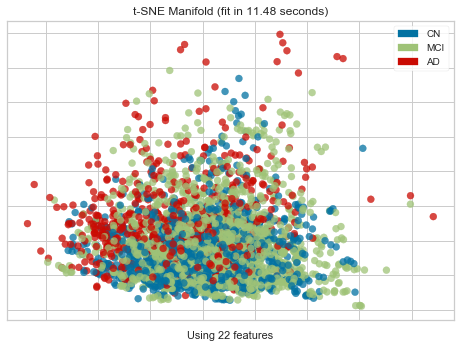

In [14]:
# manifold
from yellowbrick.features import Manifold

# manifold = 'mds'
manifold = 'tsne'

viz = Manifold(manifold=manifold, classes=classes)
viz.fit_transform(x, y)
viz.show()

In [15]:
# look at features

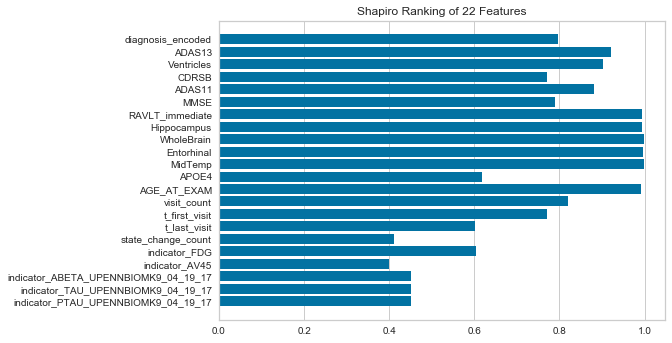

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Rank1D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a29962350>,
       color=None, features=None, orient=None, show_feature_names=None)

In [16]:
# 
from yellowbrick.features import rank1d

rank1d(x)

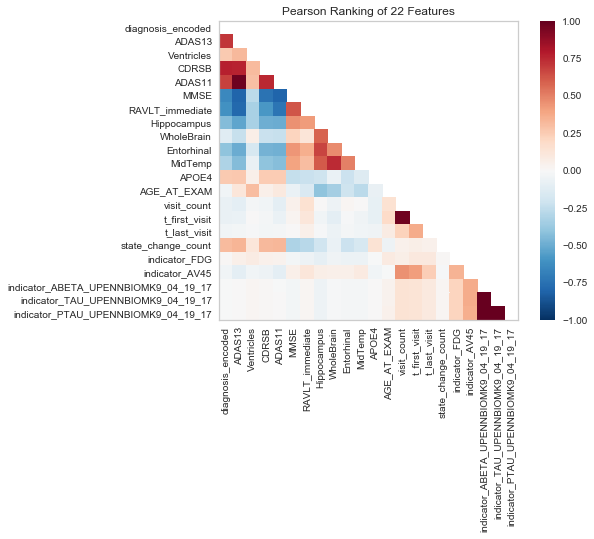

In [17]:
# correlation between features
from yellowbrick.features import Rank2D

algorithm = 'pearson'
# algorithm = 'covariance'

rank2d = Rank2D(algorithm=algorithm)
rank2d.fit(x)
rank2d.transform(x) # something weird happens with fit_transform - maybe something to contribute?
rank2d.show()

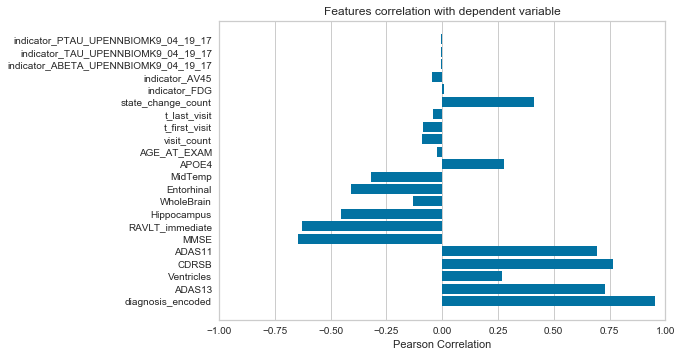

In [18]:
# correlation with target
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation

method = 'pearson'
# method = 'mutual_info-regression'
# method = 'mutual_info-classification'

vis_corr = FeatureCorrelation(method=method)

vis_corr.fit(x, y)
plt.xlim(-1, 1)
vis_corr.show()
plt.close()

In [19]:
# look at pca

<IPython.core.display.Javascript object>


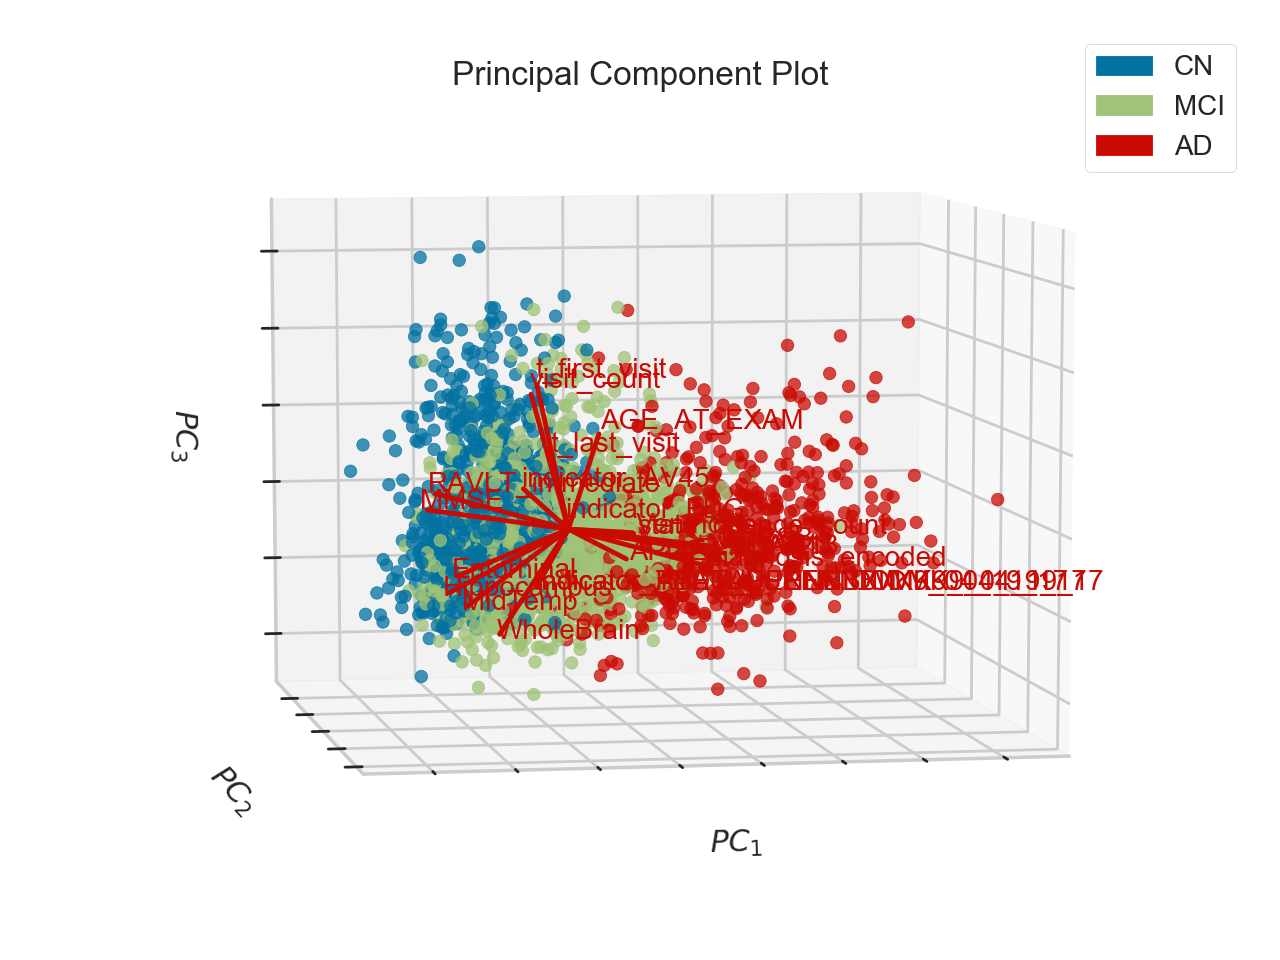

In [39]:
# pca
from yellowbrick.features import PCA

# %matplotlib notebook

projection = 3
proj_features = False
# proj_features = True

visualizer = PCA(classes=classes, projection=projection, proj_features=proj_features)
visualizer.fit_transform(x, y)
visualizer.show()

The first 14 components contain at least 95% of the variance


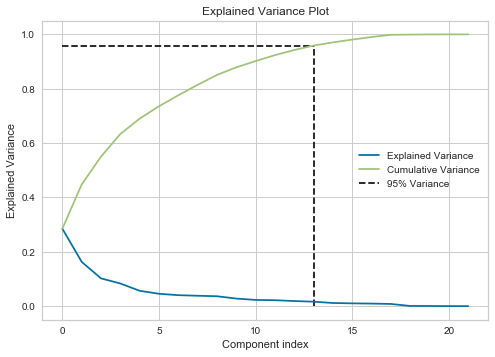

In [21]:
# explained variance
from yellowbrick.features.decomposition import ExplainedVariance
import numpy as np
import matplotlib.pyplot as plt
import bisect

# %matplotlib inline

visualizer = ExplainedVariance()
visualizer.fit_transform(x)
plt.close()

cutoff = 95

explained_variance = visualizer.pipeline['pca'].explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)

n_comp = bisect.bisect_left(cum_explained_variance, cutoff / 100)

print(f'The first {n_comp + 1} components contain at least {cutoff}% of the variance')

plt.plot(explained_variance, label='Explained Variance')
plt.plot(cum_explained_variance, label='Cumulative Variance')

plt.vlines(n_comp, 0, cum_explained_variance[n_comp], linestyle='dashed', label=f'{cutoff}% Variance')
plt.hlines(cum_explained_variance[n_comp], 0, n_comp, linestyle='dashed')

plt.title('Explained Variance Plot')
plt.ylabel('Explained Variance')
plt.xlabel('Component index')
plt.legend(loc="center right")
plt.show()

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


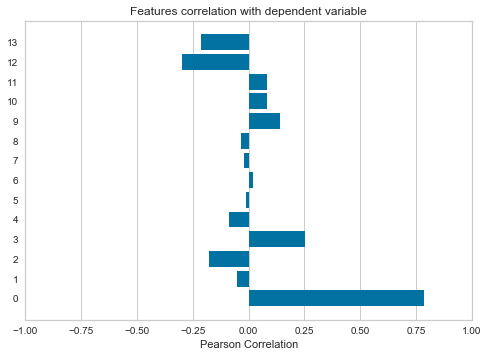

In [22]:
# correlation of PCA features with target
pca_features = visualizer.pca_features[:, :n_comp + 1]

method = 'pearson'
# method = 'mutual_info-regression'
# method = 'mutual_info-classification'

visualizer = FeatureCorrelation(method=method)

visualizer.fit(pca_features, y)
plt.xlim(-1, 1)
visualizer.show()

In [23]:
# greedy elimination
# select pair with highest correlation
# drop feature that correlates least with target



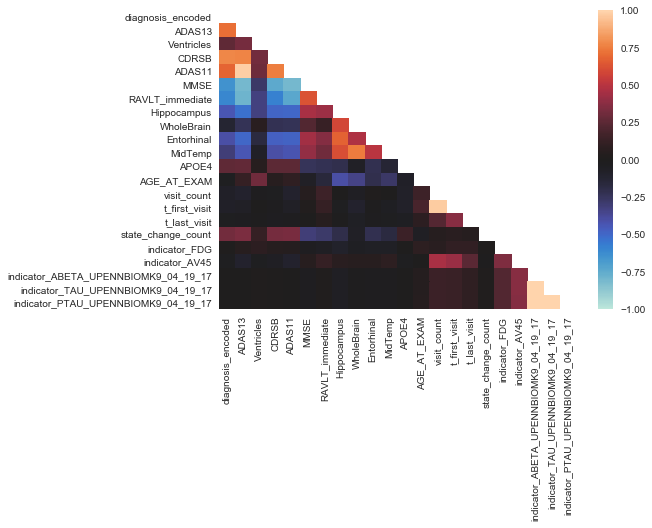

In [24]:
# look at the correlations again
import seaborn as sns

mask = np.triu(np.ones_like(x.corr(), dtype=np.bool))
sns.heatmap(x.corr(), vmin=-1, vmax=1, center=0, mask=mask)

features = x.columns

feature_correlations = x.corr()

correlations_with_target = pd.DataFrame({'feature': vis_corr.features_, 'corr': vis_corr.scores_})

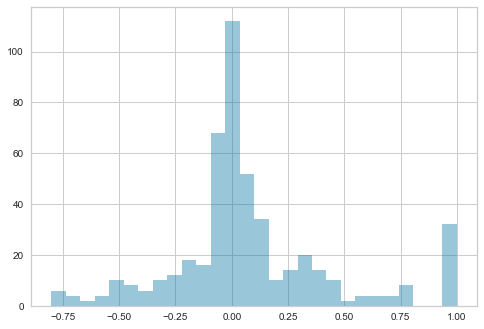

In [25]:
# distribution of correlations
sns.distplot(feature_correlations, kde=False)

In [26]:
# remove features greedily
removed_features = []

mask = np.triu(np.ones_like(x.corr().abs(), dtype=np.bool))
array = np.ma.masked_array(x.corr().abs(), mask)

for i in range(len(features)):

    # get the index of the maximum value
    idx = np.unravel_index(array.argmax(), array.shape)

    print(f'\n{idx}: {array[idx]}')
    
    # get the correlations of the corresponding features with the target
    value_1 = vis_corr.scores_[idx[0]]
    value_2 = vis_corr.scores_[idx[1]]

    print(f'feature {features[idx[0]]}: {value_1}, feature {features[idx[1]]}: {value_2}')
    
    # remove (mask over) whichever feature has the lowest correlation with the target
    if value_1 < value_2:
        print(f'removed {features[idx[0]]}')
        removed_features.append([features[idx[0]], value_1])
        array.mask[idx[0], :] = True
        array.mask[:, idx[0]] = True
    else:
        print(f'removed {features[idx[1]]}')
        removed_features.append([features[idx[1]], value_2])
        array.mask[idx[1], :] = True
        array.mask[:, idx[1]] = True

# sns.heatmap(array, vmin=-1, vmax=1, center=0, mask=array.mask)


(20, 19): 0.9988042803672558
feature indicator_TAU_UPENNBIOMK9_04_19_17: -0.006077403240332525, feature indicator_ABETA_UPENNBIOMK9_04_19_17: -0.005876917710004014
removed indicator_TAU_UPENNBIOMK9_04_19_17

(21, 19): 0.9964114321336913
feature indicator_PTAU_UPENNBIOMK9_04_19_17: -0.005249413730799273, feature indicator_ABETA_UPENNBIOMK9_04_19_17: -0.005876917710004014
removed indicator_ABETA_UPENNBIOMK9_04_19_17

(4, 1): 0.97905762817962
feature ADAS11: 0.6939163698431953, feature ADAS13: 0.7274129321344098
removed ADAS11

(14, 13): 0.9706565179446957
feature t_first_visit: -0.08597949347751876, feature visit_count: -0.08938947642164334
removed visit_count

(5, 1): 0.8023113053267702
feature MMSE: -0.6447178331880208, feature ADAS13: 0.7274129321344098
removed MMSE

(6, 1): 0.7829229228884999
feature RAVLT_immediate: -0.6273091739123178, feature ADAS13: 0.7274129321344098
removed RAVLT_immediate

(3, 0): 0.7756788631104741
feature CDRSB: 0.7668758745504234, feature diagnosis_encoded

In [27]:
removed_features

[['indicator_TAU_UPENNBIOMK9_04_19_17', -0.006077403240332525],
 ['indicator_ABETA_UPENNBIOMK9_04_19_17', -0.005876917710004014],
 ['ADAS11', 0.6939163698431953],
 ['visit_count', -0.08938947642164334],
 ['MMSE', -0.6447178331880208],
 ['RAVLT_immediate', -0.6273091739123178],
 ['CDRSB', 0.7668758745504234],
 ['MidTemp', -0.3199975572949459],
 ['ADAS13', 0.7274129321344098],
 ['Hippocampus', -0.45124027671012124],
 ['Entorhinal', -0.40883815680462754],
 ['t_first_visit', -0.08597949347751876],
 ['indicator_AV45', -0.04501042711898856],
 ['WholeBrain', -0.13052468442045248],
 ['state_change_count', 0.4102477990875304],
 ['AGE_AT_EXAM', -0.02474093852100997],
 ['APOE4', 0.27617034410344166],
 ['Ventricles', 0.269527543411873],
 ['indicator_PTAU_UPENNBIOMK9_04_19_17', -0.005249413730799273],
 ['t_last_visit', -0.038942706524145616],
 ['indicator_FDG', 0.009076978073738785],
 ['diagnosis_encoded', 0.9548339450799361]]

In [28]:
# show the removed features (reversed) with correlation with target
removed_features_arr = np.flip(np.array(removed_features), axis=0)
removed_features_arr

array([['diagnosis_encoded', '0.9548339450799361'],
       ['indicator_FDG', '0.009076978073738785'],
       ['t_last_visit', '-0.038942706524145616'],
       ['indicator_PTAU_UPENNBIOMK9_04_19_17', '-0.005249413730799273'],
       ['Ventricles', '0.269527543411873'],
       ['APOE4', '0.27617034410344166'],
       ['AGE_AT_EXAM', '-0.02474093852100997'],
       ['state_change_count', '0.4102477990875304'],
       ['WholeBrain', '-0.13052468442045248'],
       ['indicator_AV45', '-0.04501042711898856'],
       ['t_first_visit', '-0.08597949347751876'],
       ['Entorhinal', '-0.40883815680462754'],
       ['Hippocampus', '-0.45124027671012124'],
       ['ADAS13', '0.7274129321344098'],
       ['MidTemp', '-0.3199975572949459'],
       ['CDRSB', '0.7668758745504234'],
       ['RAVLT_immediate', '-0.6273091739123178'],
       ['MMSE', '-0.6447178331880208'],
       ['visit_count', '-0.08938947642164334'],
       ['ADAS11', '0.6939163698431953'],
       ['indicator_ABETA_UPENNBIOMK9_04_19

The first 13 features contain at least 40% of the normalised correlation with the target


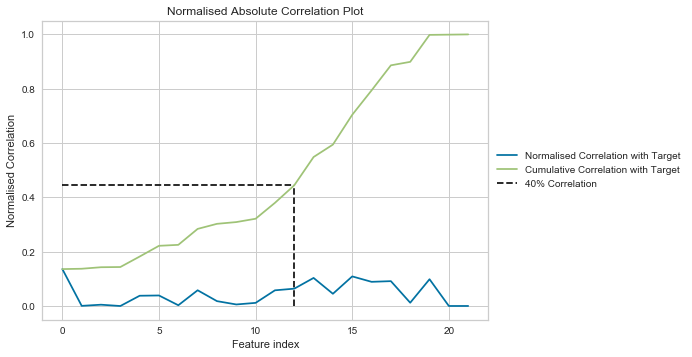

In [29]:
# plot normalised correlation with target to asess feature importance
# -> this doens't necessarily make sense here though...

cutoff = 40

feature_corrs_target = abs(removed_features_arr[:, 1].astype(float)) # this is the absolute correlation
feature_corrs_target = feature_corrs_target / feature_corrs_target.sum()
cum_feature_corrs_target = np.cumsum(feature_corrs_target)

n_comp = bisect.bisect_left(cum_feature_corrs_target, cutoff / 100)

print(f'The first {n_comp + 1} features contain at least {cutoff}% of the normalised correlation with the target')

plt.plot(feature_corrs_target, label='Normalised Correlation with Target')
plt.plot(cum_feature_corrs_target, label='Cumulative Correlation with Target')

plt.vlines(n_comp, 0, cum_feature_corrs_target[n_comp], linestyle='dashed', label=f'{cutoff}% Correlation')
plt.hlines(cum_feature_corrs_target[n_comp], 0, n_comp, linestyle='dashed')

plt.title('Normalised Absolute Correlation Plot')
plt.ylabel('Normalised Correlation')
plt.xlabel('Feature index')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# i don't know if this is really useful at all given that it's absolute...

max abs corr: 0.4690447305379901 between Entorhinal and WholeBrain
mean abs corr: 0.11933838092088271


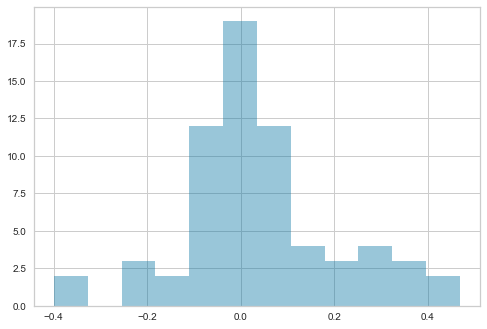

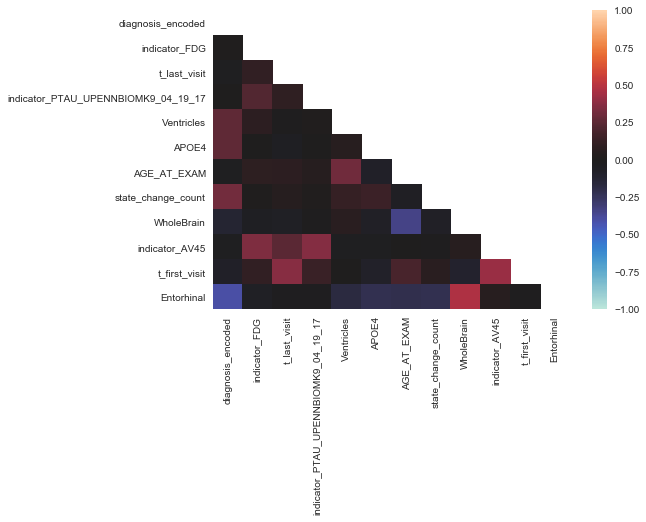

In [38]:
# show the feature correlations for the selected feature set ordered by feature correlation

n_features = 12

new_featureset = removed_features_arr[:n_features, 0]

temp = x[new_featureset].corr()
temp_abs = temp.abs()

mask = np.triu(np.ones_like(temp, dtype=np.bool))
temp_masked = np.ma.masked_array(temp_abs, mask)

max_corr = temp_masked.max()
idx_max_corr = np.unravel_index(temp_masked.argmax(), temp.shape)

print(f'max abs corr: {max_corr} between {new_featureset[idx_max_corr[0]]} and {new_featureset[idx_max_corr[1]]}')
print(f'mean abs corr: {temp_masked.mean()}')

sns.distplot(temp.values[~mask], kde=False)
# plt.xlim(-1, 1)
plt.show()

sns.heatmap(temp, vmin=-1, vmax=1, center=0, mask=mask)
plt.show()

# temp
# np.ma.masked_array(temp, mask)

In [31]:
list(new_featureset)

['diagnosis_encoded',
 'indicator_FDG',
 't_last_visit',
 'indicator_PTAU_UPENNBIOMK9_04_19_17',
 'Ventricles',
 'APOE4',
 'AGE_AT_EXAM',
 'state_change_count',
 'WholeBrain',
 'indicator_AV45',
 't_first_visit',
 'Entorhinal']

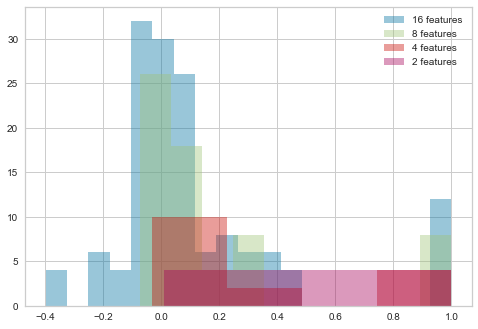

In [32]:
# plot histograms for 5, 10, 20, and 40 features

# get pairwise correlations
feature_pair_2 = temp.values[:2, :2]
feature_pair_4 = temp.values[:4, :4]
feature_pair_8 = temp.values[:8, :8]
feature_pair_16 = temp.values[:16, :16]

# plot histograms

sns.distplot(feature_pair_16, kde=False, label='16 features')
sns.distplot(feature_pair_8, kde=False, label='8 features')
sns.distplot(feature_pair_4, kde=False, label='4 features')
sns.distplot(feature_pair_2, kde=False, label='2 features', )
plt.legend()




# ggplot(featurePairGE) + 
#     geom_histogram(aes(x = coef, fill = nFeature), binwidth = 0.1) + 
#     xlab("Correlation Coefficient") +
#     labs(fill = "Number of Features") +
#     xlim(-1, 1)

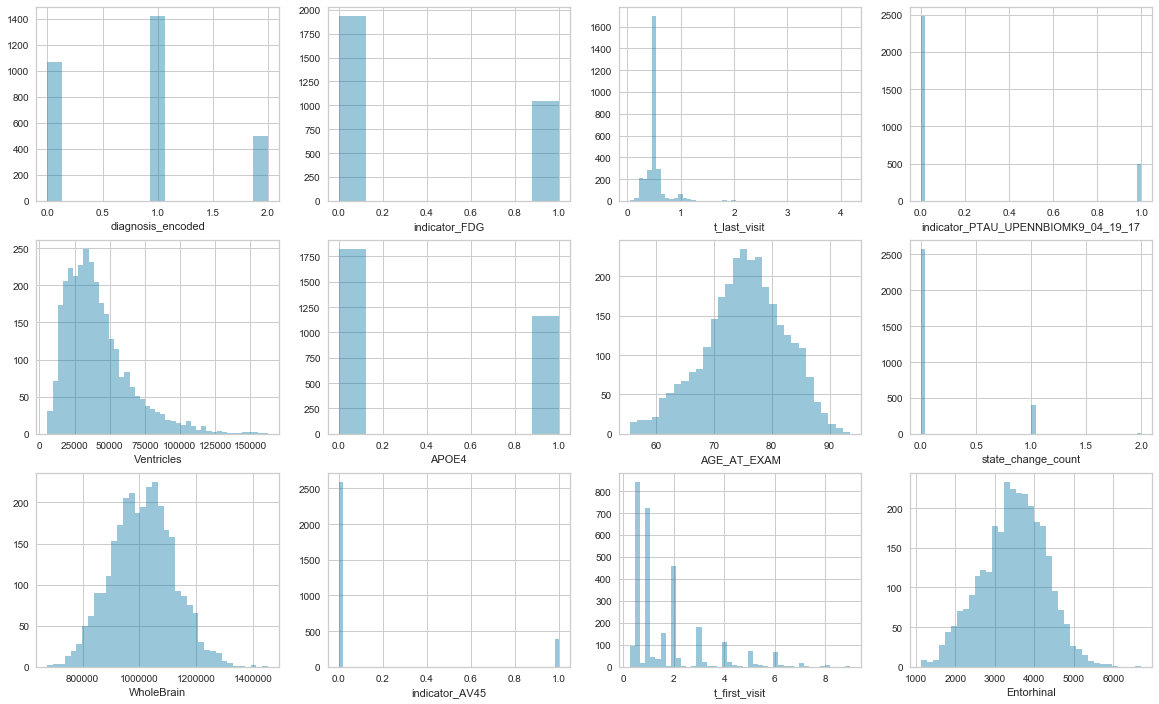

In [33]:
fig = plt.figure(figsize=(20, 25))
                 
for i, feature in enumerate(new_featureset):
    plt.subplot(6, 4, i+1)
    
    sns.distplot(x[feature], kde=False)
#     sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
#     plt.legend(loc='best')

# fig.tight_layout()
# fig.subplots_adjust(top=0.95)
# plt.show()

In [34]:
# from pairs of correlating features
# remove highest correlated that is least correlated with target
# until all relatively small